# Exploratory Data Analysis of ATLAS RPV and QCD Data

In this notebook, we use the pre-processed numpy data files for some exploratory work.
The files were produced from the Delphes ROOT files using the prepare_data.py script.
We will look at some summary information in these files and make some general physics plots.

In [1]:
# System imports
from __future__ import print_function
import os

# External imports
import numpy as np
import matplotlib.pyplot as plt

# Magic
%matplotlib notebook

## Prepare the data

Let's specify which data files we'll use and prepare some helper code for reading that data.

In [2]:
# Cori scratch space
#input_dir = os.path.join(os.getenv('SCRATCH'), 'atlasdl', 'prod004')

# Project space (for PDSF)
input_dir = os.path.join(os.getenv('PROJECT'), 'atlas_dl', 'numpy', 'prod004')

In [3]:
ls $input_dir

qcd_JZ10.npz  qcd_JZ3.npz  qcd_JZ6.npz  qcd_JZ9.npz
qcd_JZ11.npz  qcd_JZ4.npz  qcd_JZ7.npz  rpv_1400_850.npz
qcd_JZ12.npz  qcd_JZ5.npz  qcd_JZ8.npz


In [13]:
#samples = ['qcd_JZ3', 'qcd_JZ4', 'qcd_JZ5', 'qcd_JZ6', 'qcd_JZ7',
#           'qcd_JZ8', 'qcd_JZ9', 'qcd_JZ10', 'qcd_JZ11', 'qcd_JZ12',
#           'rpv_1400_850']
samples = ['qcd_JZ3', 'qcd_JZ4', 'qcd_JZ5',]
sample_files = map(lambda s: os.path.join(input_dir, s + '.npz'), samples)

In [14]:
sample_files

['/project/projectdirs/atlas/sfarrell/atlas_dl/numpy/prod004/qcd_JZ3.npz',
 '/project/projectdirs/atlas/sfarrell/atlas_dl/numpy/prod004/qcd_JZ4.npz',
 '/project/projectdirs/atlas/sfarrell/atlas_dl/numpy/prod004/qcd_JZ5.npz']

In [15]:
def get_file_keys(file_name):
    """Retrieves the list of keys from an npz file"""
    with np.load(file_name) as f:
        keys = f.keys()
    return keys

def retrieve_data(file_name, *keys):
    """
    A helper function for retrieving some specified arrays from one npz file.
    Returns a list of arrays corresponding to the requested key name list.
    """
    with np.load(file_name) as f:
        try:
            data = [f[key] for key in keys]
        except KeyError as err:
            print('Requested key not found. Available keys:', f.keys())
            raise
    return data

## Data summary

Let's print out some basic information about the samples

In [16]:
def print_file_summary(file_name):
    print('File summary for', file_name)
    print('  Keys:', get_file_keys(file_name))
    totalEvents, skimEvents, passSR4J, passSR5J, xsec = retrieve_data(
        file_name, 'totalEvents', 'skimEvents', 'passSR4J', 'passSR5J', 'xsec')
    print('  Total events:', totalEvents.sum())
    print('  Skim events:', skimEvents.sum())
    print('  SR4J events:', passSR4J.sum())
    print('  SR5J events:', passSR5J.sum())
    print('  Cross sections:', np.unique(xsec))

In [17]:
for sample_file in sample_files:
    print_file_summary(sample_file)

File summary for /project/projectdirs/atlas/sfarrell/atlas_dl/numpy/prod004/qcd_JZ3.npz
  Keys: ['clusEta', 'skimEvents', 'clusPhi', 'trackPhi', 'eventNumber', 'proc', 'passSR', 'fatJetPt', 'fatJetEta', 'passSR5J', 'passSR4J', 'fatJetPhi', 'trackPt', 'clusE', 'inputFile', 'totalEvents', 'sumFatJetM', 'xsec', 'fatJetM', 'clusEM', 'trackEta']
  Total events: 3200000
  Skim events: 2044
  SR4J events: 0
  SR5J events: 0
  Cross sections: [ 164300.]
File summary for /project/projectdirs/atlas/sfarrell/atlas_dl/numpy/prod004/qcd_JZ4.npz
  Keys: ['clusEta', 'skimEvents', 'clusPhi', 'trackPhi', 'eventNumber', 'proc', 'passSR', 'fatJetPt', 'fatJetEta', 'passSR5J', 'passSR4J', 'fatJetPhi', 'trackPt', 'clusE', 'inputFile', 'totalEvents', 'sumFatJetM', 'xsec', 'fatJetM', 'clusEM', 'trackEta']
  Total events: 3200000
  Skim events: 235392
  SR4J events: 29
  SR5J events: 23
  Cross sections: [ 1997.]
File summary for /project/projectdirs/atlas/sfarrell/atlas_dl/numpy/prod004/qcd_JZ5.npz
  Keys: ['

## Plotting and analysis utilities

Helper code for analyzing and plotting the data.

In [18]:
def make_object_histogram(sample_file, variable_key, num_bins, bin_range, normed=False):
    """Create a histogram of a requested variable from all objects in all events"""
    data, = retrieve_data(sample_file, variable_key)
    data_flat = np.concatenate(data)
    return np.histogram(data_flat, bins=num_bins, range=bin_range, normed=normed)

def make_object_histograms(sample_files, variable_key, num_bins, bin_range, normed=False):
    """Create object histograms for a list of sample files"""
    hists = []
    for sample_file in sample_files:
        print(sample_file)
        hist, bins = make_object_histogram(sample_file, variable_key, num_bins, bin_range, normed)
        hists.append(hist)
    return hists, bins

def make_hist_line(hist, bins):
    """Takes a histogram and its bin edges and gives an X-Y plot array of the top edge"""
    X = np.array([bins[:-1], bins[1:]]).T.flatten()
    Y = np.array([hist, hist]).T.flatten()
    return X, Y

## Plot unweighted distributions

Let's make some basic plots of the samples, ignoring sample weights.

Here are some examples of using np.histogram with pyplot:
http://stackoverflow.com/questions/5328556/histogram-matplotlib

In [19]:
num_pt_bins, pt_bin_range = 50, (200, 5000)
jetPtHists, jetPtBins = make_object_histograms(
    sample_files, 'fatJetPt', num_pt_bins, pt_bin_range)

/project/projectdirs/atlas/sfarrell/atlas_dl/numpy/prod004/qcd_JZ3.npz
/project/projectdirs/atlas/sfarrell/atlas_dl/numpy/prod004/qcd_JZ4.npz
/project/projectdirs/atlas/sfarrell/atlas_dl/numpy/prod004/qcd_JZ5.npz


In [20]:
num_mass_bins, mass_bin_range = 50, (0, 1000)
jetMassHists, jetMassBins = make_object_histograms(
    sample_files, 'fatJetM', num_mass_bins, mass_bin_range)

/project/projectdirs/atlas/sfarrell/atlas_dl/numpy/prod004/qcd_JZ3.npz
/project/projectdirs/atlas/sfarrell/atlas_dl/numpy/prod004/qcd_JZ4.npz
/project/projectdirs/atlas/sfarrell/atlas_dl/numpy/prod004/qcd_JZ5.npz


In [21]:
num_eta_bins, eta_bin_range = 50, (-2, 2)
jetEtaHists, jetEtaBins = make_object_histograms(
    sample_files, 'fatJetEta', num_eta_bins, eta_bin_range)

/project/projectdirs/atlas/sfarrell/atlas_dl/numpy/prod004/qcd_JZ3.npz
/project/projectdirs/atlas/sfarrell/atlas_dl/numpy/prod004/qcd_JZ4.npz
/project/projectdirs/atlas/sfarrell/atlas_dl/numpy/prod004/qcd_JZ5.npz


In [22]:
num_phi_bins, phi_bin_range = 50, (-np.pi, np.pi)
jetPhiHists, jetPhiBins = make_object_histograms(
    sample_files, 'fatJetPhi', num_phi_bins, phi_bin_range)

/project/projectdirs/atlas/sfarrell/atlas_dl/numpy/prod004/qcd_JZ3.npz
/project/projectdirs/atlas/sfarrell/atlas_dl/numpy/prod004/qcd_JZ4.npz
/project/projectdirs/atlas/sfarrell/atlas_dl/numpy/prod004/qcd_JZ5.npz


<IPython.core.display.Javascript object>


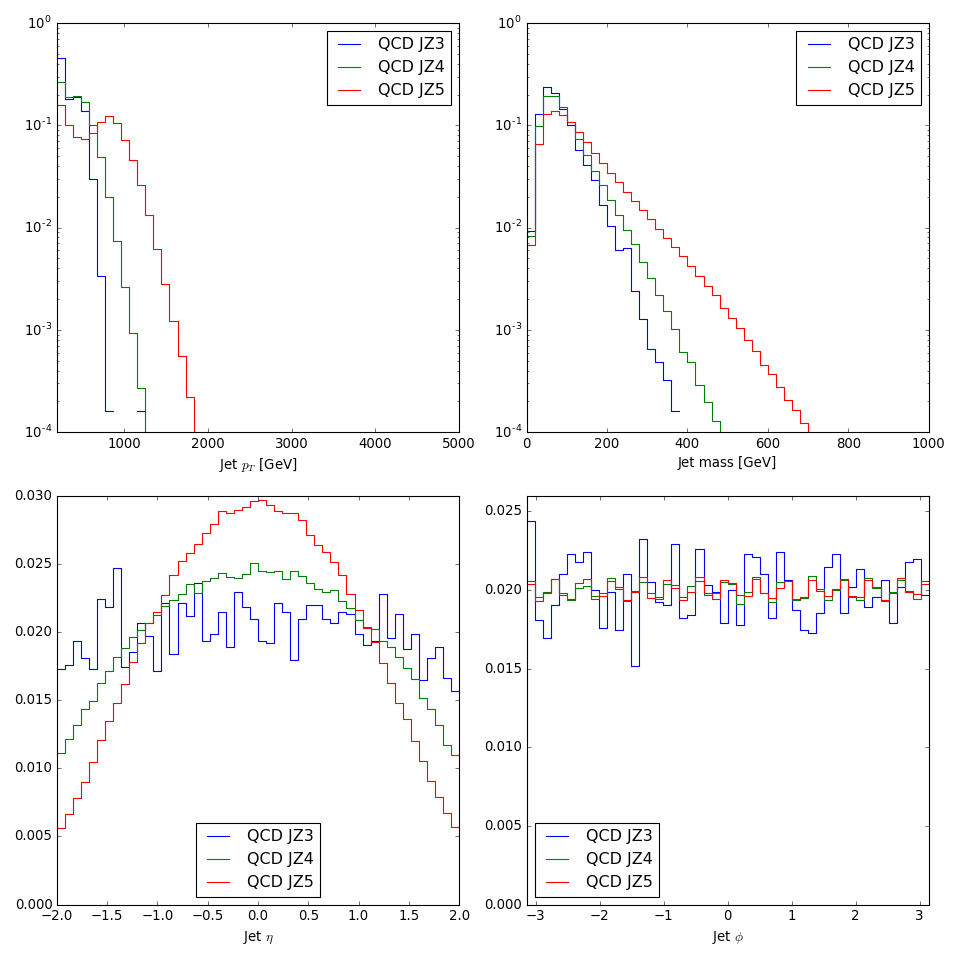

In [34]:
plt.figure(figsize=(12, 12))
labels = [s.upper().replace('_', ' ') for s in samples]

# Plot PT
plt.subplot(2, 2, 1)
for hist, label in zip(jetPtHists, labels):
    norm = float(hist.sum())
    X, Y = make_hist_line(hist/norm, jetPtBins)
    plt.semilogy(X, Y, label=label)
plt.xlim(xmin=200)
plt.ylim(ymin=1e-4)
plt.xlabel('Jet $p_T$ [GeV]')
plt.legend(loc=0)

# Plot mass
plt.subplot(2, 2, 2)
for hist, label in zip(jetMassHists, labels):
    norm = float(hist.sum())
    X, Y = make_hist_line(hist/norm, jetMassBins)
    plt.semilogy(X, Y, label=label)
plt.xlim(xmin=0)
plt.ylim(ymin=1e-4)
plt.xlabel('Jet mass [GeV]')
plt.legend(loc=0)

# Plot eta
plt.subplot(2, 2, 3)
for hist, label in zip(jetEtaHists, labels):
    norm = float(hist.sum())
    X, Y = make_hist_line(hist/norm, jetEtaBins)
    plt.plot(X, Y, label=label)
plt.ylim(ymin=0)
plt.xlim((-2, 2))
plt.xlabel('Jet $\eta$')
plt.legend(loc=0)

# Plot phi
plt.subplot(2, 2, 4)
for hist, label in zip(jetPhiHists, labels):
    norm = float(hist.sum())
    X, Y = make_hist_line(hist/norm, jetPhiBins)
    plt.plot(X, Y, label=label)
plt.ylim(ymin=0)
plt.xlim((-np.pi, np.pi))
plt.xlabel('Jet $\phi$')
plt.legend(loc=0)

plt.tight_layout()

<IPython.core.display.Javascript object>


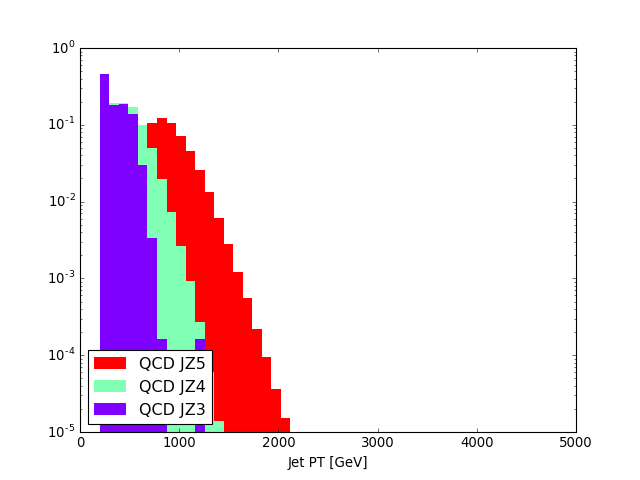

In [37]:
sample_colors = plt.cm.rainbow(np.linspace(0,1,len(samples)))
plt.figure()
for hist, sample, color in zip(jetPtHists, samples, sample_colors)[::-1]:
    label = sample.upper().replace('_', ' ')
    plt.bar(jetPtBins[:-1], hist/float(hist.sum()),
            width=np.diff(jetPtBins), label=label,
            color=color, linewidth=0, alpha=1, log=True)
plt.xlabel('Jet PT [GeV]')
plt.ylim(ymin=1e-5)
plt.legend(loc=3)

## Calculating event weights

Now let's develop the code to calculate and apply event weights using the cross section.

To start with, the easiest thing to do is assume I am weighting one sample (with one cross section) at a time. 

In [38]:
# normalize to 1/fb by default
def get_event_weight(xsec, totalEvents, lumi=1000.):
    """Get sample event weight scaled to lumi (in 1/pb)"""
    one_xsec = np.unique(xsec)
    assert one_xsec.size == 1
    return one_xsec[0] * lumi / totalEvents.sum()

In [40]:
sample_weights = []
for sample_file in sample_files:
    xsec, totalEvents = retrieve_data(sample_file, 'xsec', 'totalEvents')
    sample_weights.append(get_event_weight(xsec, totalEvents))

In [41]:
# Print some weighted counts
for sample, sample_file, sample_weight in zip(samples, sample_files, sample_weights):
    totalEvents, skimEvents, passSR4J, passSR5J, xsec = retrieve_data(
        sample_file, 'totalEvents', 'skimEvents', 'passSR4J', 'passSR5J', 'xsec')
    print('Sample ', sample)
    print('  Total events:', totalEvents.sum() * sample_weight)
    print('  Skim events:', skimEvents.sum() * sample_weight)
    print('  SR4J events:', passSR4J.sum() * sample_weight)
    print('  SR5J events:', passSR5J.sum() * sample_weight)

Sample  qcd_JZ3
  Total events: 164300000.0
  Skim events: 104946.625
  SR4J events: 0.0
  SR5J events: 0.0
Sample  qcd_JZ4
  Total events: 1997000.0
  Skim events: 146899.32
  SR4J events: 18.0978125
  SR5J events: 14.3534375
Sample  qcd_JZ5
  Total events: 41380.0
  Skim events: 7846.2687
  SR4J events: 26.03060625
  SR5J events: 8.41824375


<IPython.core.display.Javascript object>


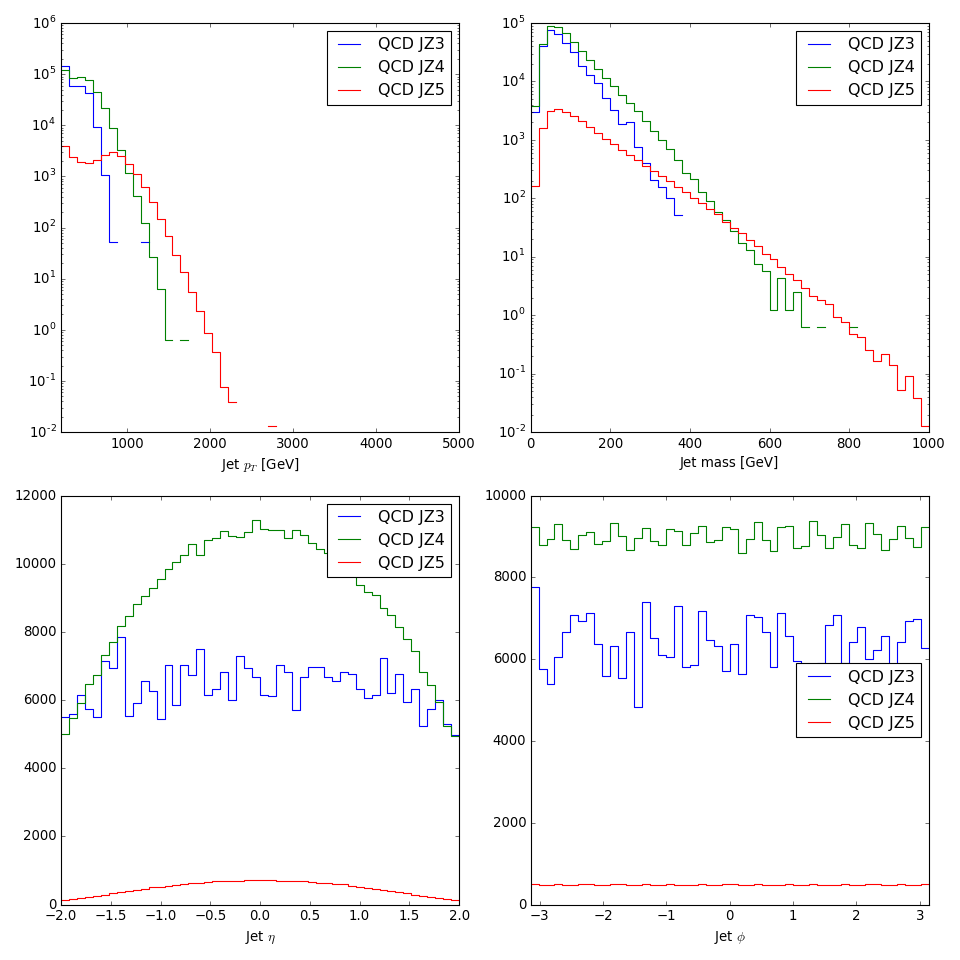

In [44]:
# Weighted plots
plt.figure(figsize=(12, 12))

# Plot PT
plt.subplot(2, 2, 1)
for hist, label, weight in zip(jetPtHists, labels, sample_weights):
    X, Y = make_hist_line(hist*weight, jetPtBins)
    plt.semilogy(X, Y, label=label)
plt.xlim(xmin=200)
plt.ylim(ymin=1e-2)
plt.xlabel('Jet $p_T$ [GeV]')
plt.legend(loc=0)

# Plot mass
plt.subplot(2, 2, 2)
for hist, label, weight in zip(jetMassHists, labels, sample_weights):
    X, Y = make_hist_line(hist*weight, jetMassBins)
    plt.semilogy(X, Y, label=label)
plt.xlim(xmin=0)
plt.ylim(ymin=1e-2)
plt.xlabel('Jet mass [GeV]')
plt.legend(loc=0)

# Plot eta
plt.subplot(2, 2, 3)
for hist, label, weight in zip(jetEtaHists, labels, sample_weights):
    X, Y = make_hist_line(hist*weight, jetEtaBins)
    plt.plot(X, Y, label=label)
plt.ylim(ymin=0)
plt.xlim((-2, 2))
plt.xlabel('Jet $\eta$')
plt.legend(loc=0)

# Plot phi
plt.subplot(2, 2, 4)
for hist, label, weight in zip(jetPhiHists, labels, sample_weights):
    X, Y = make_hist_line(hist*weight, jetPhiBins)
    plt.plot(X, Y, label=label)
plt.ylim(ymin=0)
plt.xlim((-np.pi, np.pi))
plt.xlabel('Jet $\phi$')
plt.legend(loc=0)

plt.tight_layout()